In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline



In [2]:
df = pd.read_json('../typedData/compsTypedInteraction.json')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41918 entries, 0 to 9999
Data columns (total 75 columns):
Balcony                   41918 non-null int64
Cats_Allowed              41918 non-null int64
Common_Outdoor_Space      41918 non-null int64
Dining_Room               41918 non-null int64
Dishwasher                41918 non-null int64
Dogs_Allowed              41918 non-null int64
Doorman                   41918 non-null int64
Elevator                  41918 non-null int64
Exclusive                 41918 non-null int64
Fitness_Center            41918 non-null int64
Garden_Patio              41918 non-null int64
Hardwood_Floors           41918 non-null int64
High_Speed_Internet       41918 non-null int64
Laundry_in_Unit           41918 non-null int64
New_Construction          41918 non-null int64
No_Fee                    41918 non-null int64
Outdoor_Space             41918 non-null int64
Pre_War                   41918 non-null int64
Roof_Deck                 41918 non-null int64

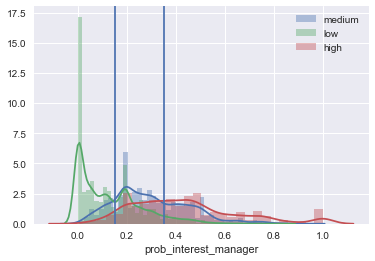

In [9]:
for i in df['interest_level'].unique():
    sns.distplot(df[df['interest_level']==i]['prob_interest_manager'], label=i)

plt.axvline(.15)
plt.axvline(.35)
plt.legend()

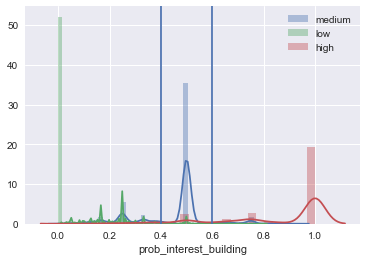

In [7]:
for i in df['interest_level'].unique():
    sns.distplot(df[df['interest_level']==i]['prob_interest_building'], label=i)

plt.axvline(.4)
plt.axvline(.6)
plt.legend()

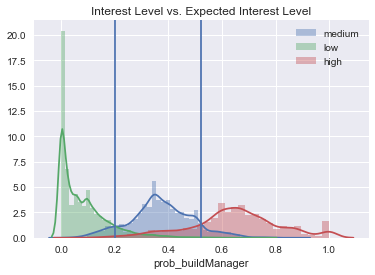

In [17]:
for i in df['interest_level'].unique():
    sns.distplot(df[df['interest_level']==i]['prob_buildManager'], label=i)

plt.axvline(.2)
plt.axvline(.52)
plt.legend()
plt.title('Interest Level vs. Expected Interest Level')
plt.savefig('../interestLevel.png')

Using pure linear classification at .2, and .52, we are able to achieve 86% accuracy.

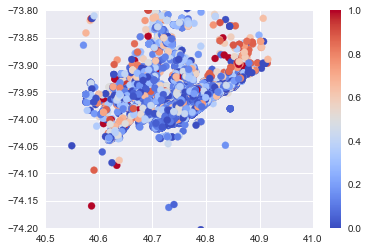

In [13]:
plt.scatter(df['latitude'], df['longitude'], c=df['prob_buildManager'], cmap='coolwarm')
plt.xlim([40.5,41])
plt.ylim([-74.2, -73.8])
plt.colorbar()

In [46]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df[['longitude', 'longitude']], df['interest_level'], test_size=0.33, random_state=42)

In [54]:
knn = KNN(n_neighbors=10)

In [56]:
acc = []
for nn in range(1, 40):
    knn = KNN(n_neighbors=nn)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    acc.append((preds==y_test).sum()/len(preds))

In [62]:
acc[acc>np.max(acc)*.99]

TypeError: only integer scalar arrays can be converted to a scalar index

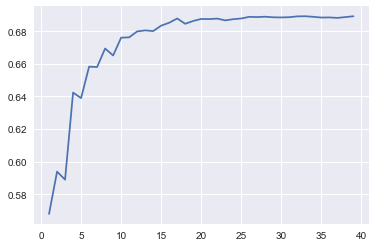

In [57]:
plt.plot(range(1, 40), acc)

In [63]:
from sklearn.metrics.pairwise import pairwise_distances

In [65]:
df.columns

Index(['Balcony', 'Cats_Allowed', 'Common_Outdoor_Space', 'Dining_Room',
       'Dishwasher', 'Dogs_Allowed', 'Doorman', 'Elevator', 'Exclusive',
       'Fitness_Center', 'Garden_Patio', 'Hardwood_Floors',
       'High_Speed_Internet', 'Laundry_in_Unit', 'New_Construction', 'No_Fee',
       'Outdoor_Space', 'Pre_War', 'Roof_Deck', 'Swimming_Pool', 'Terrace',
       'Wheelchair_Access', 'ada', 'apartment', 'avg_lux_score',
       'avg_num_features', 'avg_num_luxury', 'avg_outdoor_score',
       'avg_price_per_feature', 'avg_price_per_num_lux', 'bathrooms',
       'bedrooms', 'building_id', 'condominium', 'created', 'description',
       'display_address', 'door_excl', 'features', 'fitness_oriented',
       'foundType', 'interestVal', 'interest_level', 'latitude',
       'laundry_in_building', 'listing_id', 'loft', 'longitude',
       'lux_per_dollar', 'lux_ratio', 'lux_score', 'manager_id', 'numPhotos',
       'num_features', 'num_luxury', 'other', 'outdoor_ratio', 'outdoor_score',
    

In [67]:
buildingChar = [
        'Balcony', 'Cats_Allowed', 'Common_Outdoor_Space', 'Dining_Room',
       'Dishwasher', 'Dogs_Allowed', 'Doorman', 'Elevator', 'Exclusive',
       'Fitness_Center', 'Garden_Patio', 'Hardwood_Floors',
       'High_Speed_Internet', 'Laundry_in_Unit', 'New_Construction', 'No_Fee',
       'Outdoor_Space', 'Pre_War', 'Roof_Deck', 'Swimming_Pool', 'Terrace',
       'Wheelchair_Access', 'ada', 'bathrooms', 'num_features', 
       'bedrooms', 'fitness_oriented', 'rooms',
]

building = df[buildingChar]

In [71]:
jac_sim = 1 - pairwise_distances(building.T, metric = "hamming")

In [73]:
jac_sim = pd.DataFrame(jac_sim, index=building.columns, columns=building.columns)

In [74]:
jac_sim.head()

,Balcony,Cats_Allowed,Common_Outdoor_Space,Dining_Room,Dishwasher,Dogs_Allowed,Doorman,Elevator,Exclusive,Fitness_Center,...,Roof_Deck,Swimming_Pool,Terrace,Wheelchair_Access,ada,bathrooms,num_features,bedrooms,fitness_oriented,rooms
Balcony,1.000000,0.523546,0.913641,0.883177,0.631042,0.551458,0.606470,0.518584,0.895725,0.729138,...,0.844244,0.902357,0.944916,0.917458,0.917768,0.041724,0.065223,0.198912,0.905077,0.010592
Cats_Allowed,0.523546,1.000000,0.537812,0.509447,0.480939,0.967699,0.548404,0.516151,0.526767,0.567250,...,0.525478,0.521995,0.521423,0.526886,0.526862,0.384942,0.070638,0.261940,0.524619,0.091560
Common_Outdoor_Space,0.913641,0.537812,1.000000,0.870724,0.568873,0.566964,0.593301,0.494489,0.933990,0.745694,...,0.846009,0.919533,0.927931,0.946658,0.946968,0.027745,0.065246,0.193568,0.924400,0.009018
Dining_Room,0.883177,0.509447,0.870724,1.000000,0.675915,0.535450,0.622859,0.541844,0.851520,0.731929,...,0.830049,0.874946,0.890262,0.884703,0.884966,0.061740,0.065223,0.204471,0.877284,0.011236
Dishwasher,0.631042,0.480939,0.568873,0.675915,1.000000,0.487619,0.668591,0.667398,0.557255,0.661959,...,0.667040,0.622000,0.620473,0.605277,0.605158,0.303211,0.066511,0.248151,0.619662,0.064316


In [283]:
def classify(x):
    if x < .2:
        return 'low'
    elif x<.52:
        return 'medium'
    else:
        return 'high'

In [284]:
preds = df['prob_buildManager'].apply(classify)

In [285]:
print(classification_report(preds, df['interest_level']))

             precision    recall  f1-score   support

       high       0.80      0.74      0.77      3540
        low       0.89      0.97      0.93     26903
     medium       0.83      0.69      0.75     11475

avg / total       0.87      0.87      0.87     41918



In [261]:
df.to_json('./typedData/compsTypedInteraction.json')

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41918 entries, 0 to 41917
Data columns (total 75 columns):
Balcony                   41918 non-null int64
Cats_Allowed              41918 non-null int64
Common_Outdoor_Space      41918 non-null int64
Dining_Room               41918 non-null int64
Dishwasher                41918 non-null int64
Dogs_Allowed              41918 non-null int64
Doorman                   41918 non-null int64
Elevator                  41918 non-null int64
Exclusive                 41918 non-null int64
Fitness_Center            41918 non-null int64
Garden_Patio              41918 non-null int64
Hardwood_Floors           41918 non-null int64
High_Speed_Internet       41918 non-null int64
Laundry_in_Unit           41918 non-null int64
New_Construction          41918 non-null int64
No_Fee                    41918 non-null int64
Outdoor_Space             41918 non-null int64
Pre_War                   41918 non-null int64
Roof_Deck                 41918 non-null int6

In [263]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [264]:
data = df.drop('interestVal', axis=1).select_dtypes(exclude=['object'])

In [265]:
X_train, X_test, y_train, y_test = train_test_split(data, df['interest_level'], test_size=0.33, random_state=42)

knn = KNN(n_neighbors=10, weights='distance', algorithm='auto')
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
print(classification_report(preds, y_test))

knn = KNN(n_neighbors=10, weights='uniform', algorithm='auto')
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
cr = classification_report(preds, y_test)
print(cr)

In [268]:
accuracyUniform = []
for nn in range(1, 25):
    knn = KNN(n_neighbors=nn, weights='uniform', algorithm='auto')
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    accuracyUniform.append((preds==y_test).sum()/len(preds))

accuracyDistance = []
for nn in range(1, 25):
    knn = KNN(n_neighbors=nn, weights='distance', algorithm='auto')
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    accuracyDistance.append((preds==y_test).sum()/len(preds))

In [282]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

sns.set_context('poster')

In [270]:
accuracyDistance.index(np.max(accuracyDistance))

3

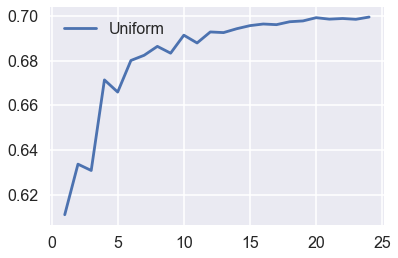

In [271]:
#plt.plot(range(1, 25), accuracyDistance, label='Distance')
plt.plot(range(1, 25), accuracyUniform, label='Uniform')
plt.legend()

knn = KNN(n_neighbors=22, weights='uniform', algorithm='auto')
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
print(classification_report(preds, y_test))

print(confusion_matrix(preds, y_test))

In [272]:
df.columns

Index(['Balcony', 'Cats_Allowed', 'Common_Outdoor_Space', 'Dining_Room',
       'Dishwasher', 'Dogs_Allowed', 'Doorman', 'Elevator', 'Exclusive',
       'Fitness_Center', 'Garden_Patio', 'Hardwood_Floors',
       'High_Speed_Internet', 'Laundry_in_Unit', 'New_Construction', 'No_Fee',
       'Outdoor_Space', 'Pre_War', 'Roof_Deck', 'Swimming_Pool', 'Terrace',
       'Wheelchair_Access', 'ada', 'apartment', 'avg_lux_score',
       'avg_num_features', 'avg_num_luxury', 'avg_outdoor_score',
       'avg_price_per_feature', 'avg_price_per_num_lux', 'bathrooms',
       'bedrooms', 'building_id', 'condominium', 'created', 'description',
       'display_address', 'door_excl', 'features', 'fitness_oriented',
       'foundType', 'interestVal', 'interest_level', 'latitude',
       'laundry_in_building', 'listing_id', 'loft', 'longitude',
       'lux_per_dollar', 'lux_ratio', 'lux_score', 'manager_id', 'numPhotos',
       'num_features', 'num_luxury', 'other', 'outdoor_ratio', 'outdoor_score',
    

In [276]:
simple = df[['Hardwood_Floors', 'High_Speed_Internet', 'Laundry_in_Unit', 'No_Fee', 'avg_num_features',
            'avg_num_luxury', 'avg_outdoor_score', 'avg_price_per_feature', 'avg_price_per_num_lux', 'bathrooms', 
            'bedrooms', 'condominium', 'interestVal', 'interest_level', 'laundry_in_building', 'loft', 
            'lux_ratio', 'lux_score', 'numPhotos', 'ph', 'pets_allowed', 'price_feature_ratio', 'townhome',
             'walk_up', 'prob_interest_manager', 'prob_interest_building', 'rooms', 'price_per_room', 'prob_buildManager'
            ]]

In [277]:
simple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41918 entries, 0 to 41917
Data columns (total 29 columns):
Hardwood_Floors           41918 non-null int64
High_Speed_Internet       41918 non-null int64
Laundry_in_Unit           41918 non-null int64
No_Fee                    41918 non-null int64
avg_num_features          41918 non-null float64
avg_num_luxury            41918 non-null float64
avg_outdoor_score         41918 non-null float64
avg_price_per_feature     41918 non-null float64
avg_price_per_num_lux     41918 non-null float64
bathrooms                 41918 non-null float64
bedrooms                  41918 non-null int64
condominium               41918 non-null int64
interestVal               41918 non-null float64
interest_level            41918 non-null object
laundry_in_building       41918 non-null int64
loft                      41918 non-null int64
lux_ratio                 41918 non-null float64
lux_score                 41918 non-null float64
numPhotos                 

In [278]:
X_train, X_test, y_train, y_test = train_test_split(simple.drop(['interestVal', 'interest_level'],axis=1),
                                                    simple['interest_level'], test_size=0.33, random_state=42)

In [279]:
accuracyDistance = []
for nn in range(1, 40):
    knn = KNN(n_neighbors=nn, weights='uniform', algorithm='auto')
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    accuracyDistance.append((preds==y_test).sum()/len(preds))

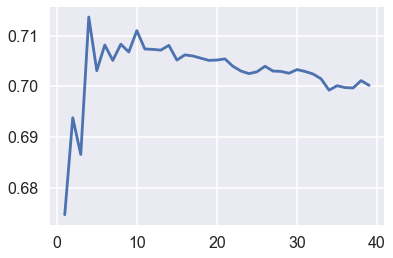

In [280]:
plt.plot(range(1, 40), accuracyDistance, label='Uniform')

In [281]:
nn = accuracyDistance.index(np.max(accuracyDistance))
knn = KNN(n_neighbors=nn, weights='distance', algorithm='auto')
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
print(classification_report(preds, y_test))
print('Number of Neighbors: ' + str(nn))

             precision    recall  f1-score   support

       high       0.26      0.35      0.30       760
        low       0.86      0.80      0.83     10437
     medium       0.34      0.41      0.37      2636

avg / total       0.73      0.70      0.71     13833

Number of Neighbors: 3


KNN is overfitting. I am going to try just a simple LDA on the data

In [247]:
X_train, X_test, y_train, y_test = train_test_split(simple.drop(['interestVal', 'interest_level'],axis=1),
                                                    simple['interest_level'], test_size=0.33, random_state=42)

In [287]:
from sklearn.linear_model import LogisticRegressionCV as logCV

In [291]:
model = logCV(cv=10, class_weight='balanced', multi_class='multinomial')
model.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='multinomial', n_jobs=1, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [293]:
preds = model.predict(X_test)
print(classification_report(preds, y_test))

             precision    recall  f1-score   support

       high       0.83      0.63      0.71      1338
        low       0.93      0.96      0.95      9389
     medium       0.74      0.75      0.74      3106

avg / total       0.88      0.88      0.88     13833



In [299]:
modelOVR = logCV(cv=10, class_weight='balanced')
modelOVR.fit(X_train, y_train)
preds = modelOVR.predict(X_test)
print(classification_report(preds, y_test))

             precision    recall  f1-score   support

       high       0.85      0.64      0.73      1351
        low       0.94      0.96      0.95      9571
     medium       0.73      0.79      0.76      2911

avg / total       0.89      0.89      0.89     13833



In [302]:
modelOVR = logCV(cv=10)
modelOVR.fit(X_train, y_train)
preds = modelOVR.predict(X_test)
print(classification_report(preds, y_test))

             precision    recall  f1-score   support

       high       0.81      0.76      0.79      1087
        low       0.98      0.93      0.95     10262
     medium       0.69      0.87      0.77      2484

avg / total       0.91      0.90      0.91     13833



To make sure that I didnt leave something out, i will try the CV Log with the full dataset

In [307]:
data = df.drop('interestVal', axis=1).select_dtypes(exclude=['object'])
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    df['interest_level'], test_size=0.33, random_state=42)

In [308]:
modelAll = logCV(cv=10)
modelAll.fit(X_train, y_train)
preds = modelAll.predict(X_test)
print(classification_report(preds, y_test))

             precision    recall  f1-score   support

       high       0.00      0.00      0.00         0
        low       1.00      0.70      0.83     13773
     medium       0.01      0.30      0.01        60

avg / total       0.99      0.70      0.82     13833



/Users/Braden/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


This clearly indicates that we have too much information and must use some sort of algorithmic feature selection to accurately asses the data. 